In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import string
#https://stackoverflow.com/questions/19726663/how-to-save-the-pandas-dataframe-series-data-as-a-figure
import six
import math

In [2]:
tbpath = "../../fits/"
productpath = "../../postfit_derivatives/"

In [3]:
df = pd.read_csv(tbpath + 'fit_table_reweighted_042820.csv') 

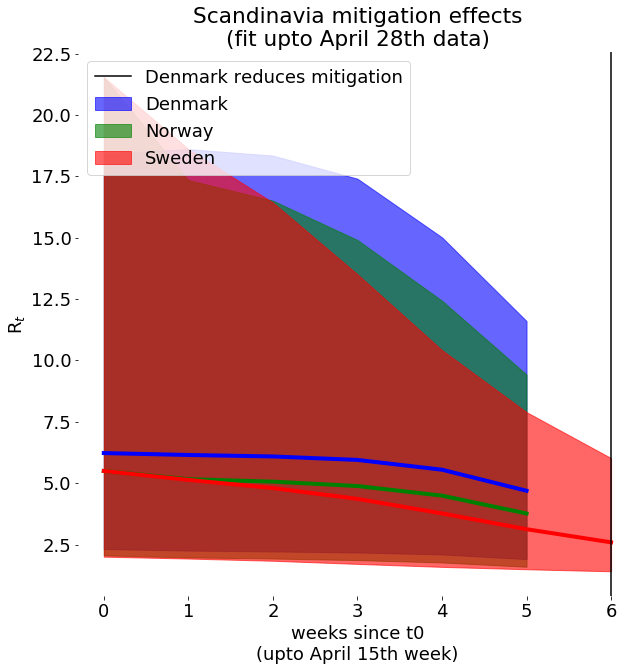

In [25]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    

Slb = []
Dlb = [] 
Nlb = []    
    
Sm = []
Dm = [] 
Nm = []

Sub = []
Dub = [] 
Nub = []


col = 'R0'

Slb.append(df.loc[(df.roi=='Sweden')&(df['quantile']=='0.025'), col].values[0])
Dlb.append(df.loc[(df.roi=='Denmark')&(df['quantile']=='0.025'), col].values[0]) 
Nlb.append(df.loc[(df.roi=='Norway')&(df['quantile']=='0.025'), col].values[0]) 

Sm.append(df.loc[(df.roi=='Sweden')&(df['quantile']=='0.5'), col].values[0])
Dm.append(df.loc[(df.roi=='Denmark')&(df['quantile']=='0.5'), col].values[0])
Nm.append(df.loc[(df.roi=='Sweden')&(df['quantile']=='0.5'), col].values[0]) 

Sub.append(df.loc[(df.roi=='Sweden')&(df['quantile']=='0.975'), col].values[0])
Dub.append(df.loc[(df.roi=='Denmark')&(df['quantile']=='0.975'), col].values[0])
Nub.append(df.loc[(df.roi=='Sweden')&(df['quantile']=='0.975'), col].values[0]) 

for i in np.arange(1,8).astype(str):
    col = 'Rt (week '+i+')'
    Slb.append(df.loc[(df.roi=='Sweden')&(df['quantile']=='0.025'), col].values[0])
    Dlb.append(df.loc[(df.roi=='Denmark')&(df['quantile']=='0.025'), col].values[0]) 
    Nlb.append(df.loc[(df.roi=='Norway')&(df['quantile']=='0.025'), col].values[0]) 

    Sm.append(df.loc[(df.roi=='Sweden')&(df['quantile']=='0.5'), col].values[0])
    Dm.append(df.loc[(df.roi=='Denmark')&(df['quantile']=='0.5'), col].values[0])
    Nm.append(df.loc[(df.roi=='Norway')&(df['quantile']=='0.5'), col].values[0]) 

    Sub.append(df.loc[(df.roi=='Sweden')&(df['quantile']=='0.975'), col].values[0])
    Dub.append(df.loc[(df.roi=='Denmark')&(df['quantile']=='0.975'), col].values[0])
    Nub.append(df.loc[(df.roi=='Norway')&(df['quantile']=='0.975'), col].values[0])

f,ax = plt.subplots(1,1,figsize=(10,10))
a = 0.6
lw = 4
x = np.arange(len(Dlb))
ax.fill_between(x, Dlb,Dub,label='Denmark',alpha=a,color='b') 
ax.plot(Dm, color='b', linewidth=lw)
ax.fill_between(x, Nlb,Nub,label='Norway',alpha=a,color='g') 
ax.plot(Nm, color='g', linewidth=lw) 
ax.fill_between(x, Slb,Sub,label='Sweden',alpha=a,color='r') 
ax.plot(Sm, color='r', linewidth=lw) 
    
# plt.plot(Ny, label='Norway')  
#    
# plt.plot(Sy, label='Sweden')
# plt.ylabel('Rt')
simpleaxis(plt.gca())
plt.title('Scandinavia mitigation effects\n(fit upto April 28th data)')
plt.ylabel(r'R$_t$')
plt.xlabel('weeks since t0\n(upto April 15th week)')
plt.axvline(6,color='k',label='Denmark reduces mitigation')
plt.legend()

           